# **Neural network regression with tensorflow**

In [1]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf

2024-07-11 22:21:39.376133: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-11 22:21:39.398244: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 22:21:39.415787: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 22:21:39.415804: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-11 22:21:39.432212: I tensorflow/core/platform/cpu_feature_gua

In [3]:
print(tf.__version__)

2.16.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt

## **Generating datasets**

In [5]:
# Create features
X = np.arange(start = -7, stop = 15, step = 3, dtype = 'float32')

In [6]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)

In [7]:
# Create labels
y = np.arange(start = 3, stop = 25, step = 3, dtype = 'float32')

In [8]:
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)

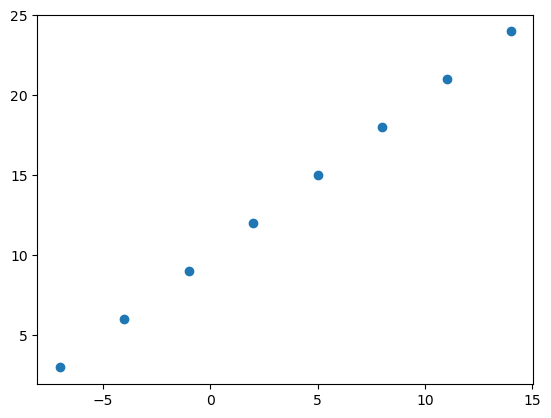

In [9]:
plt.scatter(X, y)
plt.show()

In [10]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
X = tf.constant(X)

2024-07-11 22:21:41.835077: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-11 22:21:41.957506: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-11 22:21:41.957545: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-11 22:21:41.959584: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-11 22:21:41.959613: I external/local_xla/xla/stream_executor

In [12]:
y = tf.constant(y)

## **Creating a model**

In [13]:
tf.random.set_seed(42)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [15]:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [16]:
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 13.0663 - mae: 13.0663
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.9338 - mae: 12.9338
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.8013 - mae: 12.8013
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.6688 - mae: 12.6688
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.5363 - mae: 12.5363


I0000 00:00:1720729302.604703  132515 service.cc:145] XLA service 0x7fdcb4004b50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720729302.604782  132515 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-11 22:21:42.616408: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-11 22:21:42.654657: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1720729302.732938  132515 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [17]:
y_pred = model.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [18]:
y_pred

array([[5.1315804]], dtype=float32)

## **Improving the model**

#### **Inrease number of epochs**

In [19]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [20]:
model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [21]:
model2.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 8.5613 - mae: 8.5613
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.4288 - mae: 8.4288
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.2963 - mae: 8.2963
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.1638 - mae: 8.1638
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.0313 - mae: 8.0313
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.8988 - mae: 7.8988
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.7663 - mae: 7.7663
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.6338 - mae: 7.6338
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.5013 - mae: 7.5013
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4325 - mae: 7.4325
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4269 - mae: 7.4269
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4212 - mae: 7.4212
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/st

In [22]:
y_pred2 = model2.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [23]:
y_pred2

array([[30.11561]], dtype=float32)

#### **Add extra hidden layer**

In [24]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [25]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [26]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 15.3094 - mae: 15.3094
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.7470 - mae: 14.7470
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.2085 - mae: 14.2085
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.6823 - mae: 13.6823
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.1618 - mae: 13.1618
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.6421 - mae: 12.6421
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.1254 - mae: 12.1254
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.6112 - mae: 11.6112
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.0852 - mae: 11.0852
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.5477 - mae: 10.5477
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.9890 - mae: 9.9890
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.4705 - mae: 9.4705
Epoch 13/100
1/1 ━━━━━━━━━━━

In [27]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [28]:
y_pred3

array([[31.569042]], dtype=float32)

#### **Some more changes**

1. Decreasing numbers of neurons in the first hidden layer

In [29]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [30]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [31]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 13.7898 - mae: 13.7898
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.2508 - mae: 13.2508
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.7119 - mae: 12.7119
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.1704 - mae: 12.1704
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.6234 - mae: 11.6234
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.0680 - mae: 11.0680
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.5015 - mae: 10.5015
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.9209 - mae: 9.9209
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.3232 - mae: 9.3232
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.7054 - mae: 8.7054
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.0643 - mae: 8.0643
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.3965 - mae: 7.3965
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [32]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [33]:
y_pred3

array([[30.078545]], dtype=float32)

2. Change optimizer function to Adam with default arguments

In [34]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [35]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

In [36]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - loss: 14.1394 - mae: 14.1394
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.0712 - mae: 14.0712
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.0032 - mae: 14.0032
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.9352 - mae: 13.9352
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.8673 - mae: 13.8673
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.7994 - mae: 13.7994
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.7316 - mae: 13.7316
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.6639 - mae: 13.6639
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.5962 - mae: 13.5962
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.5286 - mae: 13.5286
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.4610 - mae: 13.4610
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.3934 - mae: 13.3934
Epoch 13/100
1/1 ━━━━━━━

In [37]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [38]:
y_pred

array([[5.1315804]], dtype=float32)

3. Set learning rate to 0.01 for Adam optimizer

In [39]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [40]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

In [41]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - loss: 15.3464 - mae: 15.3464
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.5181 - mae: 14.5181
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.8330 - mae: 13.8330
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.1578 - mae: 13.1578
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.4885 - mae: 12.4885
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.8230 - mae: 11.8230
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.1595 - mae: 11.1595
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.4962 - mae: 10.4962
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.8312 - mae: 9.8312
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.1623 - mae: 9.1623
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4871 - mae: 8.4871
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.8031 - mae: 7.8031
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [42]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [43]:
y_pred3

array([[27.092669]], dtype=float32)

## **Evaluating a model**

In [44]:
X2 = tf.range(-100, 100, 4)

In [45]:
X2

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [46]:
y2 = X2 + 10

In [47]:
y2

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

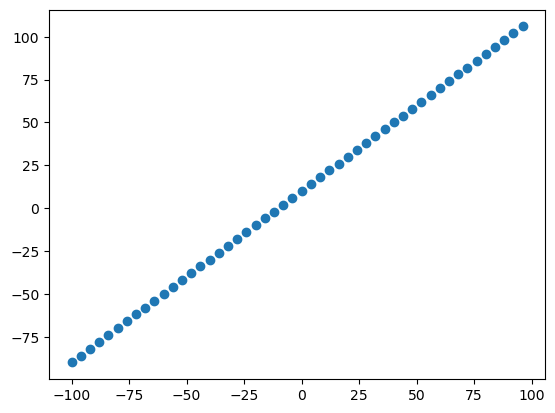

In [48]:
plt.scatter(X2, y2)
plt.show()

In [49]:
X2_train = X2[:40]

In [50]:
y2_train = y2[:40]

In [51]:
X2_test = X2[40:]

In [52]:
y2_test = y2[40:]

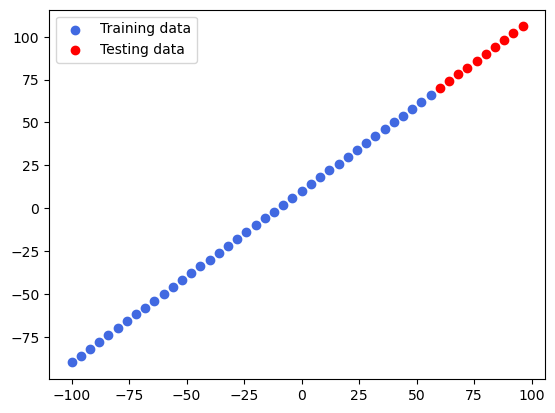

In [53]:
plt.scatter(X2_train, y2_train, c = 'royalblue', label = 'Training data')
plt.scatter(X2_test, y2_test, c = 'red', label = 'Testing data')
plt.legend()
plt.show()

In [54]:
model4 = tf.keras.models.Sequential([
    # tf.keras.layers.Dense(1, input_shape = [1])
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [55]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
model4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

In [57]:
model4.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 40.8078 - mae: 40.8078
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.6113 - mae: 25.6113 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7444 - mae: 11.7444 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.1737 - mae: 11.1737 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.7258 - mae: 14.7258 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.3011 - mae: 15.3011 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.0536 - mae: 13.0536 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.1982 - mae: 10.1982 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1880 - mae: 7.1880 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4635 - mae: 9.4635 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6390 - mae: 9.6390 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6482 - mae: 7.6482 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [58]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

In [59]:
y2_pred = model4.predict(tf.expand_dims(X2_test, axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [60]:
y2_test, y2_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 70.46831 ],
        [ 74.49959 ],
        [ 78.53087 ],
        [ 82.56215 ],
        [ 86.593445],
        [ 90.624725],
        [ 94.656006],
        [ 98.68729 ],
        [102.71857 ],
        [106.749855]], dtype=float32))

In [61]:
from tensorflow.keras.utils import plot_model

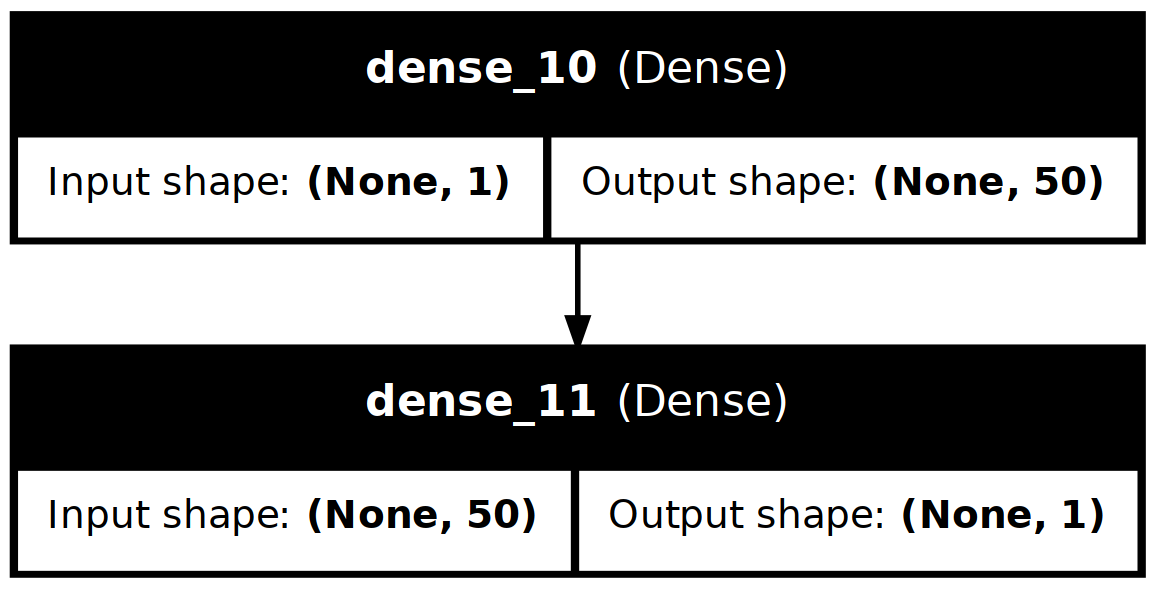

In [62]:
plot_model(model4, show_shapes = True, show_layer_names = True, expand_nested = True, rankdir = 'TB')

In [63]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize = (10, 6))
    plt.style.use('seaborn-v0_8')
    # Scatter the training data
    plt.scatter(x = train_data, y = train_labels, label = 'Training data')
    # Scatter the testing data
    plt.scatter(x = test_data, y = test_labels, label = 'Testing data', c = 'red')
    # Scatter the predictions
    plt.scatter(x = test_data, y = predictions, label = 'Predictions', c = 'green')
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend()
    plt.show()

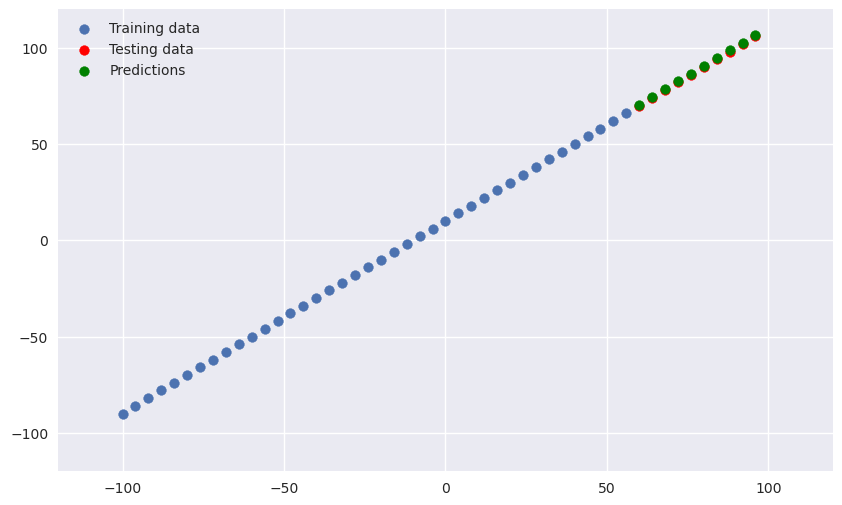

In [64]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, y2_pred)

In [65]:
model4.evaluate(X2_test, y2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.6091 - mae: 0.6091


[0.6090797185897827, 0.6090797185897827]

In [69]:
def get_metrics(y_true, y_pred):
    mae = tf.keras.metrics.mae(y_true, y_pred)
    mse = tf.keras.metrics.mse(y_true, y_pred)
    huber = tf.keras.metrics.huber(y_true, y_pred)
    return mae, mse, huber

In [70]:
mae, mse, huber = get_metrics(y2_test, tf.squeeze(y2_pred))

In [71]:
print(f'MAE: {mae:.4f}; MSE: {mse:.4f}; Huber: {huber:.4f}')

MAE: 0.6091; MSE: 0.3791; Huber: 0.1895
